In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate

import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Initialize the model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  # Use latest model: gemini-2.0-flash, gemini-1.5-pro, etc.
    temperature=0.7
)

# Create a prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that explains concepts clearly."),
    ("human", "Explain {topic} in simple terms")
])

# Create a chain using the new syntax (LLMChain is deprecated)
chain = prompt | llm

# Run the chain
result = chain.invoke({"topic": "quantum computing"})
print(result.content)

Okay, let's break down quantum computing in a way that's easy to understand.

**The Core Idea:  Harnessing Weird Quantum Physics for Computing Power**

Imagine regular computers use light switches that are either ON (1) or OFF (0).  That's how they store and process information – as bits.

Quantum computers are different. They use *quantum bits* (called **qubits**).  Qubits are like those light switches, but instead of just being ON or OFF, they can be ON, OFF, or *both* at the same time! This "both at the same time" state is called **superposition**.

**Think of it like this:**

*   **Regular Bit:**  A coin that's either heads or tails.
*   **Qubit:** A coin spinning in the air. It's *both* heads and tails at the same time until it lands.

**Why is "both at the same time" so powerful?**

Because a qubit can represent many possibilities simultaneously, quantum computers can explore many solutions to a problem at once.  This is like trying all the doors in a maze *at the same time* inst

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.runnables import RunnablePassthrough
from langchain_community.chat_message_histories import ChatMessageHistory
from dotenv import load_dotenv
import os

# Load .env variables
load_dotenv()

# Initialize Google Gemini model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.7
)

# Message-based memory (replacement for ConversationBufferMemory)
history = ChatMessageHistory()

# Create chat prompt template
conversation_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant. Use the conversation history to provide context-aware responses."),
    ("placeholder", "{chat_history}"),
    ("human", "{input}")
])

# Chain that injects memory into the prompt
conversation_chain = (
    RunnablePassthrough.assign(
        chat_history=lambda x: history.messages   # pass list of messages
    )
    | conversation_prompt
    | llm
)

# Chat function
def chat(message):
    # Add user message to memory
    history.add_user_message(message)

    # Run chain
    response = conversation_chain.invoke({"input": message})

    # Save assistant response to memory
    history.add_ai_message(response.content)

    return response.content


# Test conversation
print(chat("Hi, my name is Alice"))
print(chat("What's my name?"))
print(chat("Tell me a joke about my name"))


Hi Alice, it's nice to meet you! How can I help you today?
Your name is Alice.
Okay, here's a joke about your name, Alice:

Why did Alice bring a ladder to the Mad Hatter's tea party?

... Because she heard the refreshments were on the house!


In [15]:
print(chat("who iss Alice from above conversection?"))


In the above conversation, Alice is you! You introduced yourself as Alice at the beginning of our conversation.


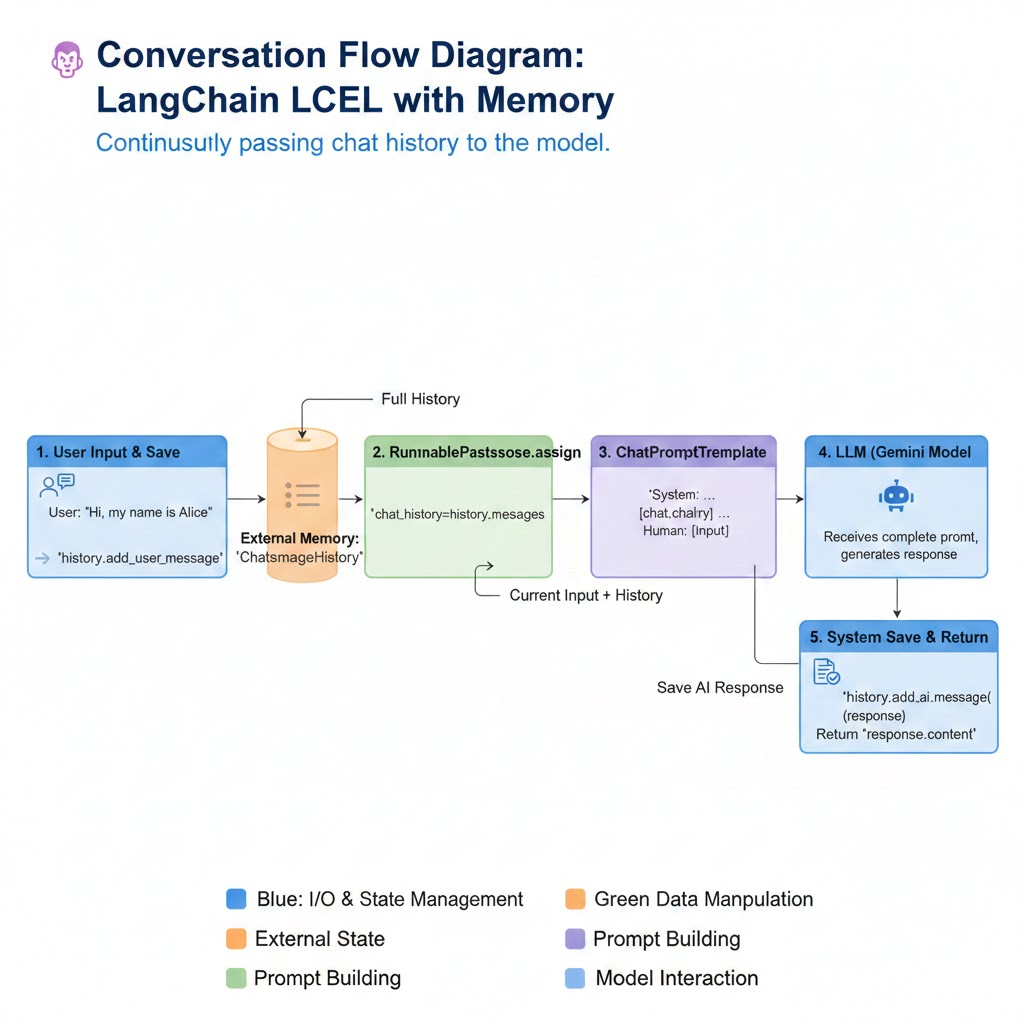